In [108]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd
import io
# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")


df2 = pd.read_csv('Absenteeism_at_work.csv',sep=';')
# Dataset is now stored in a Pandas Dataframe
df2.shape
print(df2)



     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                    

In [122]:
print(df2['Absenteeism time in hours'])

x=df2['Absenteeism time in hours'].to_numpy()

print(x)

y=df2['Education'].to_numpy()
y
print(y)





0      4
1      0
2      2
3      4
4      2
      ..
735    8
736    4
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64
[  4   0   2   4   2   2   8   4  40   8   8   8   8   1   4   8   2   8
   8   2   8   1  40   4   8   7   1   4   8   2   8   8   4   8   2   1
   8   4   8   4   2   4   4   8   2   3   3   4   8  32   0   0   2   2
   0   0   3   3   0   1   3   4   3   3   0   1   3   3   3   2   2   5
   8   3  16   8   2   8   1   3   1   1   8   8   5  32   8  40   1   8
   3   8   3   4   1   3  24   3   1  64   2   8   2   8  56   8   3   3
   2   8   2   8   2   1   1   1   8   2   2   2   1   2   2   2   2   2
   2   2   2   8   8   2   2   2   0   1   3   1   8   8   2   8   2   8
   8   8   2   2   1   8   3   8   1   1   8   2   8   3   8   8   8   8
   3  40  40  16  16   8   8   8   4   1   8  24   2   8   1   8  16   3
  16   2   3   1   1   1   1  24   1   2   4  24   1   3   8   1   8  56
   8  24   8  16   3   0   8   2   1   

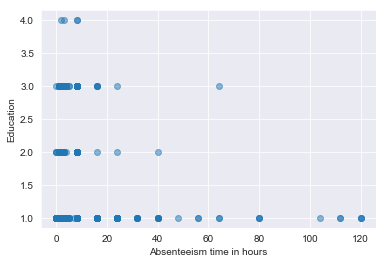

In [124]:
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Absenteeism time in hours', 
       ylabel='Education');

In [64]:
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

In [132]:

print(x.shape)
print(x)
z=np.reshape(x,(-1,1))
print(x.shape)
print(y.shape)
w=np.reshape(y,(-1,1))
beta = np.linalg.lstsq(z, w)[0]
print(beta[0])
beta2 = dot(dot(inv(dot(z.T, z)),z.T),w) 
print(beta2[0])

(740,)
[  4   0   2   4   2   2   8   4  40   8   8   8   8   1   4   8   2   8
   8   2   8   1  40   4   8   7   1   4   8   2   8   8   4   8   2   1
   8   4   8   4   2   4   4   8   2   3   3   4   8  32   0   0   2   2
   0   0   3   3   0   1   3   4   3   3   0   1   3   3   3   2   2   5
   8   3  16   8   2   8   1   3   1   1   8   8   5  32   8  40   1   8
   3   8   3   4   1   3  24   3   1  64   2   8   2   8  56   8   3   3
   2   8   2   8   2   1   1   1   8   2   2   2   1   2   2   2   2   2
   2   2   2   8   8   2   2   2   0   1   3   1   8   8   2   8   2   8
   8   8   2   2   1   8   3   8   1   1   8   2   8   3   8   8   8   8
   3  40  40  16  16   8   8   8   4   1   8  24   2   8   1   8  16   3
  16   2   3   1   1   1   1  24   1   2   4  24   1   3   8   1   8  56
   8  24   8  16   3   0   8   2   1   8   8   4   2   1  24   0   0   0
   0   1  24   8   8   8  24   4   8   8   4   8   8  16   1  80   8   2
   2   2  16   8   8   4   8   8   2   8   8

C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


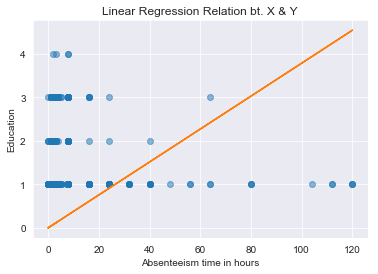

In [138]:
predictions = z* beta # making use of numpy's broadcast
predictions_withouth_intercept = predictions

ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Absenteeism time in hours', 
       ylabel='Education',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x, predictions) # overlay a line plot over a scatter plot 
plt.show()